In [1]:
# Imports and scripts
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pathmagic
%matplotlib inline
with pathmagic.context():
    import Preprocess as Prep
    import RelativePaths as RP
    import Evaluation as Eva
    import GatherData as Gather
    import Graphs
    import Utils

system = 'prom'

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Laoa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# File containing settings
path_to_yaml = '../config.yaml'
config = Utils.read_yaml_file(path_to_yaml)

files = config['file locations'][system]
preprocess_settings = config['preprocess settings list']

In [3]:
# set file_locations which will be relative to computer in use
from pathlib import Path

system_folder = str(Path.cwd().parent / files['system folder'])

raw_data_csv = str(Path.cwd().parent / files['raw data'])
tmp_csv = str(Path.cwd().parent / files['tmp data'])

processed_data_csv = str(Path.cwd().parent / files['data size percentage'])

In [4]:
Gather.gather_architectural_concerns_data(system_folder, raw_data_csv)

Text(0.5, 1.0, 'Shows the number of files for every label, from JabRef')

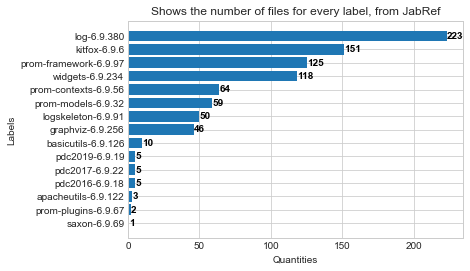

In [5]:
dataset_df = pd.read_csv(raw_data_csv)
y_labels = dataset_df.Label.unique()
x_quantity = [len(dataset_df.loc[dataset_df['Label']==label]) for label in y_labels]
tmp_df = pd.DataFrame({
    'Labels' : y_labels,
    'Quantity' : x_quantity
})
tmp_df = tmp_df.sort_values(by=['Quantity'])
plt.style.use("seaborn-whitegrid")
plt.barh(y=tmp_df.Labels, width=tmp_df.Quantity)
for i, v in enumerate(tmp_df.Quantity):
    plt.text(v, i, str(v), color='black', fontweight='bold', ha='left', va='center')

plt.xlabel('Quantities')
plt.ylabel('Labels')
plt.title('Shows the number of files for every label, from JabRef')

## Preprocessing

In [6]:
setting = preprocess_settings['s0']


Prep.preprocess_settings(setting, raw_data_csv, processed_data_csv)

processed_data_df = pd.read_csv(processed_data_csv)
df_sliced = Utils.remove_concerns_under_quantity_threshold(processed_data_df)

----

## Testing:
    - Test different sample sizes: 5,10,15,20%

In [7]:
maxEnt_accuracy_test1 = []
svm_accuracy_test1 = []
naive_accuracy_test1 = []

maxEnt_precision_test1 = []
svm_precision_test1 = []
naive_precision_test1 = []

maxEnt_recall_test1 = []
svm_recall_test1 = []
naive_recall_test1 = []

# Test 1
- Train-size: 10%
- Test-size: 90 %

In [8]:
test_size=0.9
fold_quantity = 100
feature_representation = CountVectorizer()
# Train and gather evaluation metrics
evaluate = Eva.Evaluation(df_sliced, feature_representation, test_size, fold_quantity)
classifier_max_ent , metrics_max_ent = evaluate.evaluate_MaxEnt()
classifier_svm , metrics_svm = evaluate.evaluate_SVM()
classifier_naive, metrics_naive = evaluate.evaluate_Naive_Bayes()

metrics = {
    'maxEnt': metrics_max_ent,
    'SVM': metrics_svm,
    'Naive': metrics_naive
}

# Evaluate

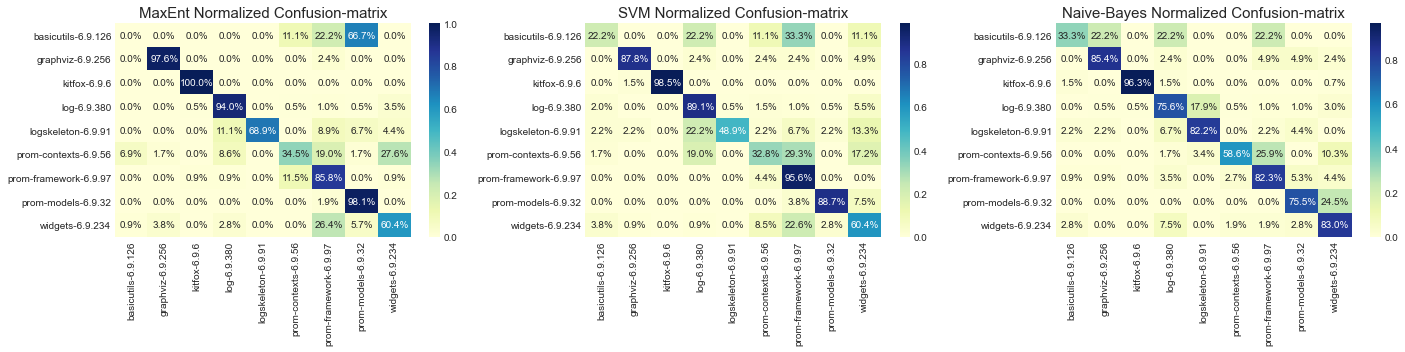

In [9]:
Graphs.plot_horizontal_graphs(metrics, 'norm')

# Classification report

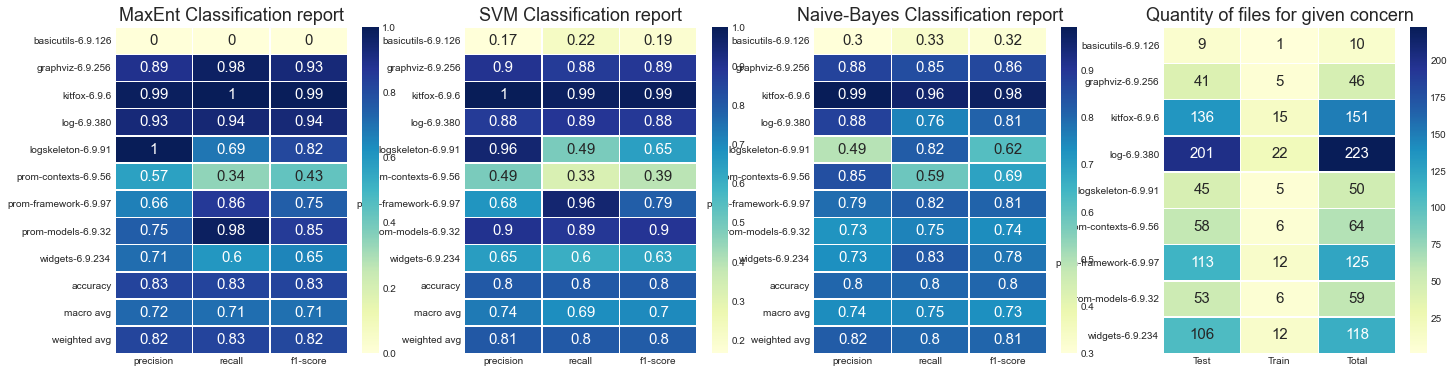

<Figure size 432x288 with 0 Axes>

In [10]:
Graphs.plot_horizontal_graphs(metrics, 'report')

# Prediction averages

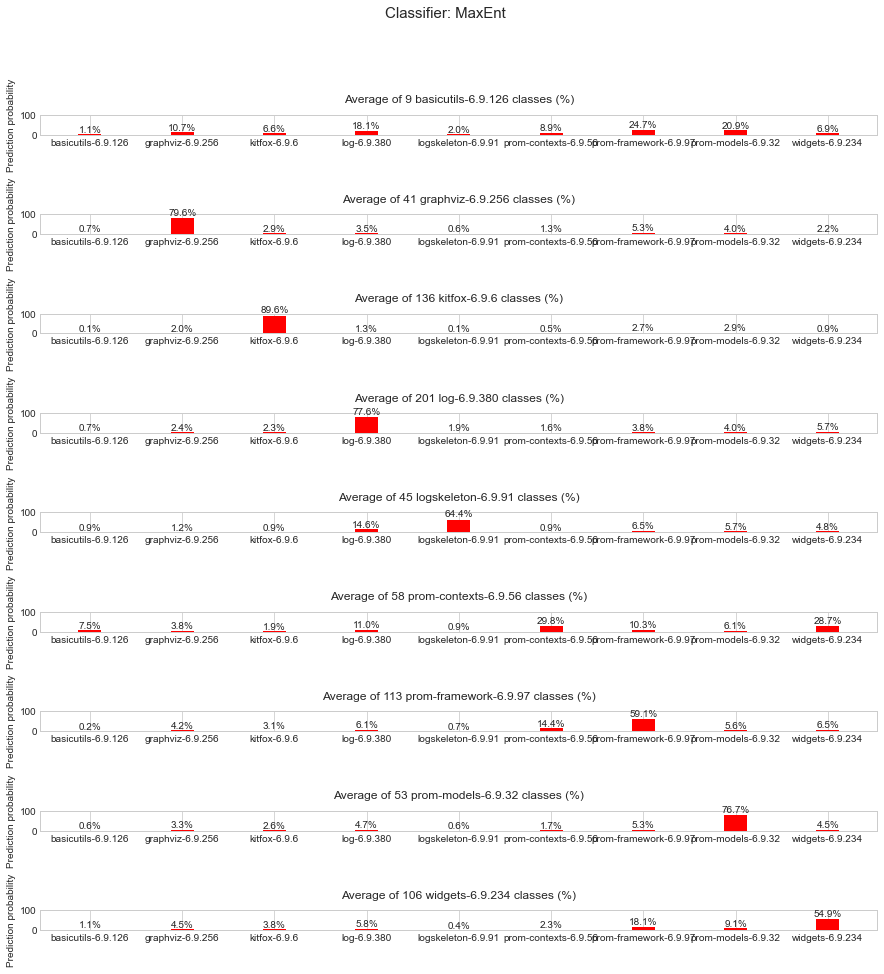

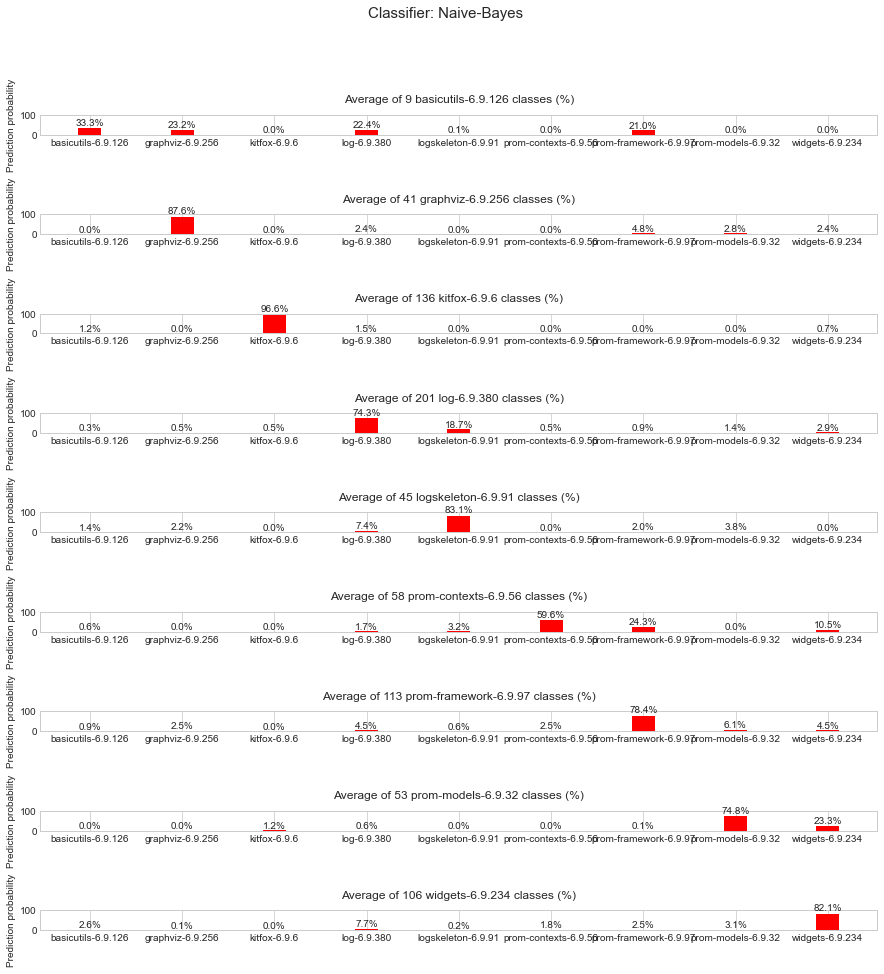

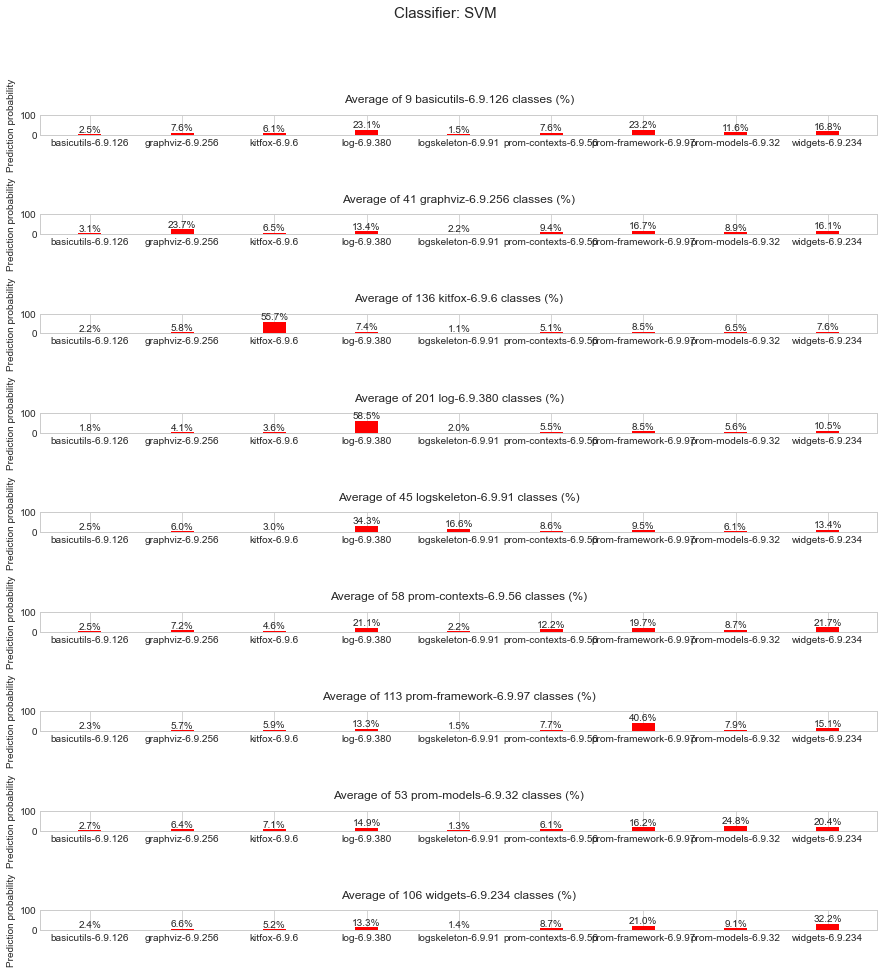

In [11]:
Graphs.plot_predictionScoreAverage(metrics_max_ent, classifier_max_ent)
Graphs.plot_predictionScoreAverage(metrics_naive, classifier_naive)
Graphs.plot_predictionScoreAverage(metrics_svm, classifier_svm)

In [12]:
maxEnt_accuracy_test1.append(metrics_max_ent.get_accuracy_score())
svm_accuracy_test1.append(metrics_svm.get_accuracy_score())
naive_accuracy_test1.append(metrics_naive.get_accuracy_score())

maxEnt_precision_test1.append(metrics_max_ent.get_precision_score())
svm_precision_test1.append(metrics_svm.get_precision_score())
naive_precision_test1.append(metrics_naive.get_precision_score())

maxEnt_recall_test1.append(metrics_max_ent.get_recall_score())
svm_recall_test1.append(metrics_svm.get_recall_score())
naive_recall_test1.append(metrics_naive.get_recall_score())

----

# Test 2
- Test size: 85 %
- Train size: 15 %

In [13]:
test_size=0.85
fold_quantity = 100
feature_representation = CountVectorizer()
# Train and gather evaluation metrics
confusion_list = []

evaluate = Eva.Evaluation(df_sliced, feature_representation, test_size, fold_quantity)
classifier_max_ent , metrics_max_ent = evaluate.evaluate_MaxEnt()
classifier_svm , metrics_svm = evaluate.evaluate_SVM()
classifier_naive, metrics_naive = evaluate.evaluate_Naive_Bayes()

metrics = {
    'maxEnt': metrics_max_ent,
    'SVM': metrics_svm,
    'Naive': metrics_naive
}

# Evaluation
## Confusion matrix


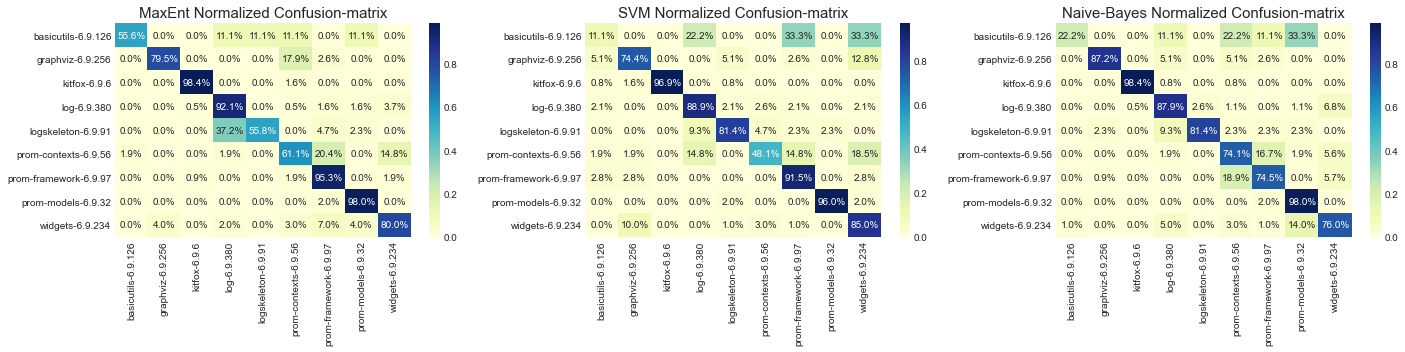

In [14]:
Graphs.plot_horizontal_graphs(metrics, 'norm')

# Classification report

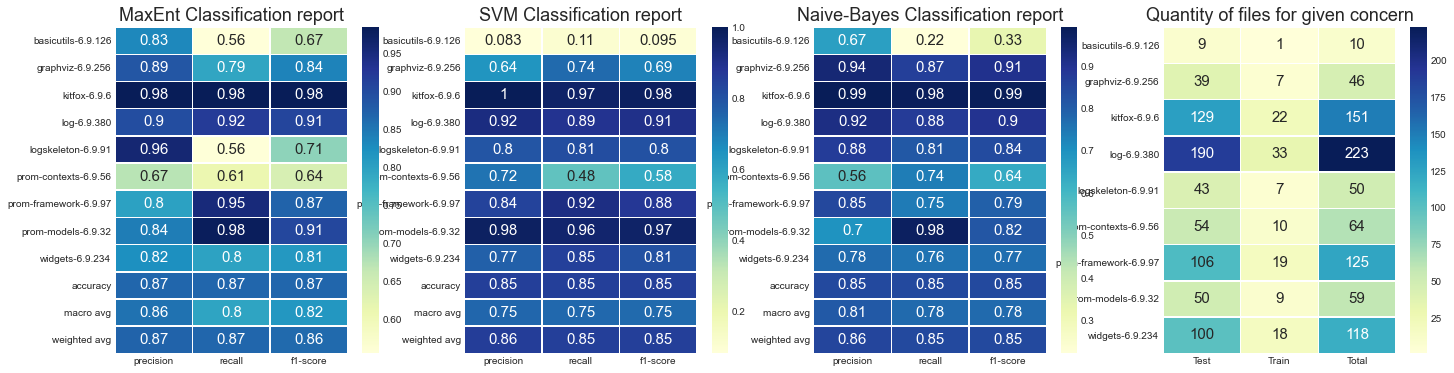

<Figure size 432x288 with 0 Axes>

In [15]:
Graphs.plot_horizontal_graphs(metrics, 'report')

# Prediction average

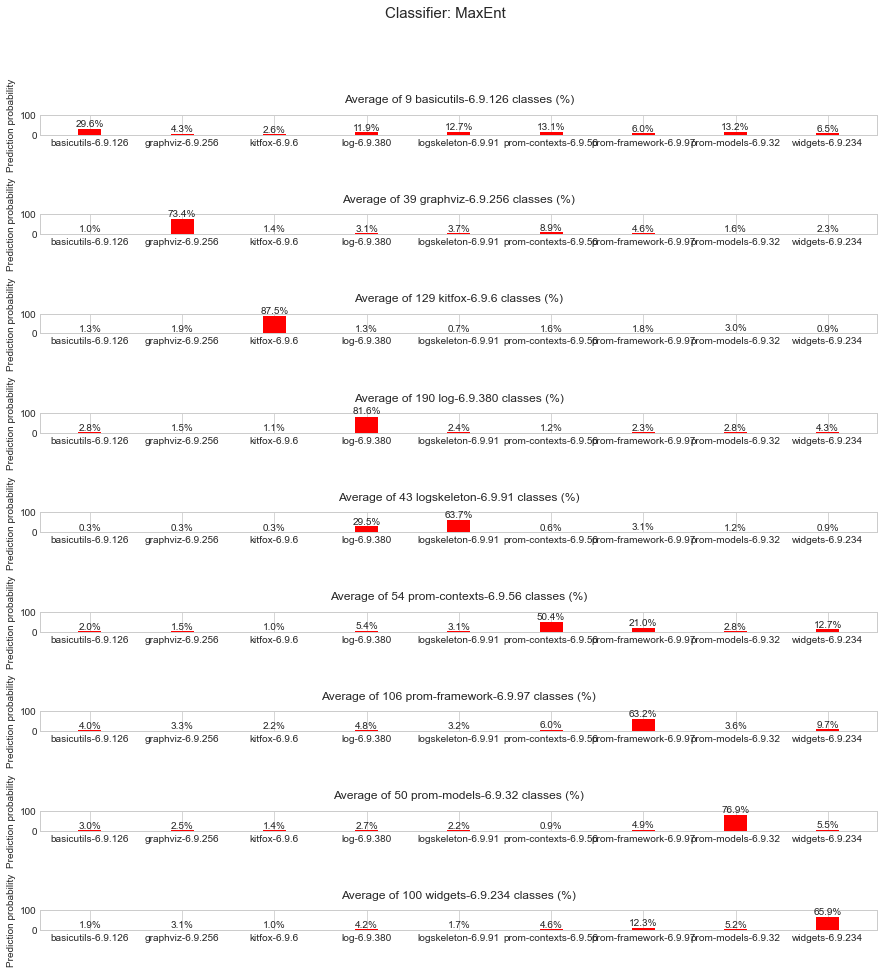

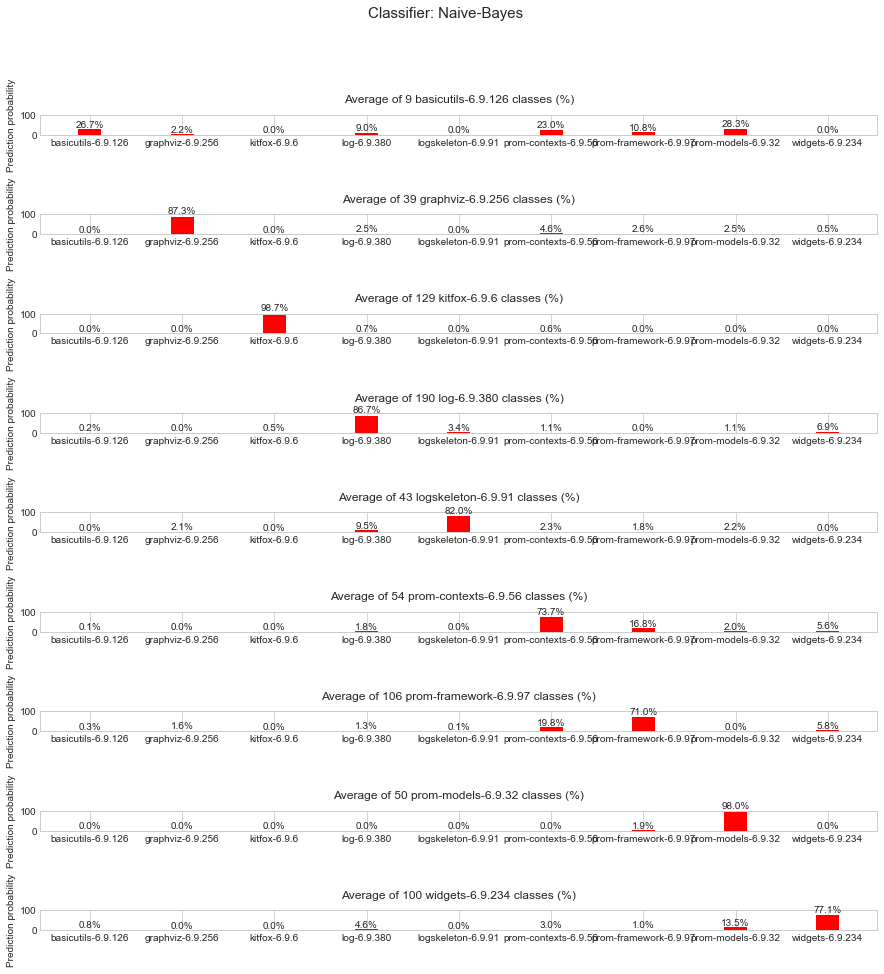

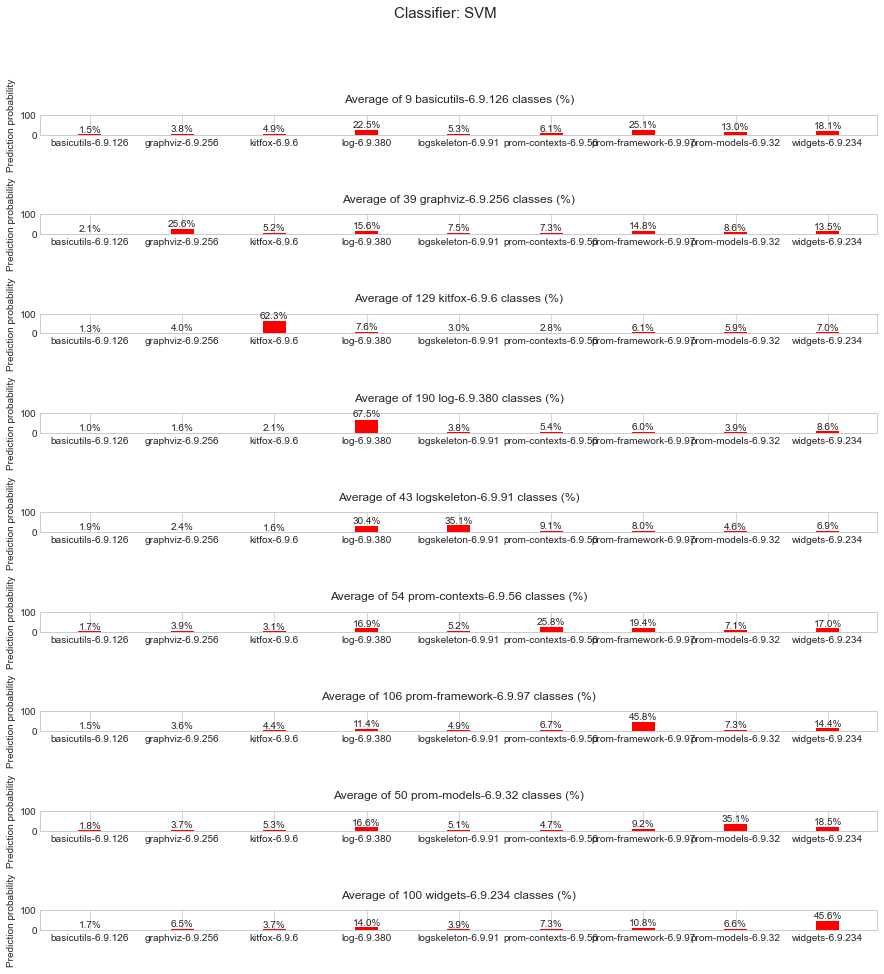

In [16]:
Graphs.plot_predictionScoreAverage(metrics_max_ent, classifier_max_ent)
Graphs.plot_predictionScoreAverage(metrics_naive, classifier_naive)
Graphs.plot_predictionScoreAverage(metrics_svm, classifier_svm)

In [17]:
maxEnt_accuracy_test1.append(metrics_max_ent.get_accuracy_score())
svm_accuracy_test1.append(metrics_svm.get_accuracy_score())
naive_accuracy_test1.append(metrics_naive.get_accuracy_score())

maxEnt_precision_test1.append(metrics_max_ent.get_precision_score())
svm_precision_test1.append(metrics_svm.get_precision_score())
naive_precision_test1.append(metrics_naive.get_precision_score())


maxEnt_recall_test1.append(metrics_max_ent.get_recall_score())
svm_recall_test1.append(metrics_svm.get_recall_score())
naive_recall_test1.append(metrics_naive.get_recall_score())

----

# Test 3: Test/Train 80/20 (%)

In [18]:
test_size=0.80
fold_quantity = 100
feature_representation = CountVectorizer()
# Train and gather evaluation metrics
confusion_list = []

evaluate = Eva.Evaluation(df_sliced, feature_representation, test_size, fold_quantity)
classifier_max_ent , metrics_max_ent = evaluate.evaluate_MaxEnt()
classifier_svm , metrics_svm = evaluate.evaluate_SVM()
classifier_naive, metrics_naive = evaluate.evaluate_Naive_Bayes()

metrics = {
    'maxEnt': metrics_max_ent,
    'SVM': metrics_svm,
    'Naive': metrics_naive
}

# Evaluation
## Confusion matrix

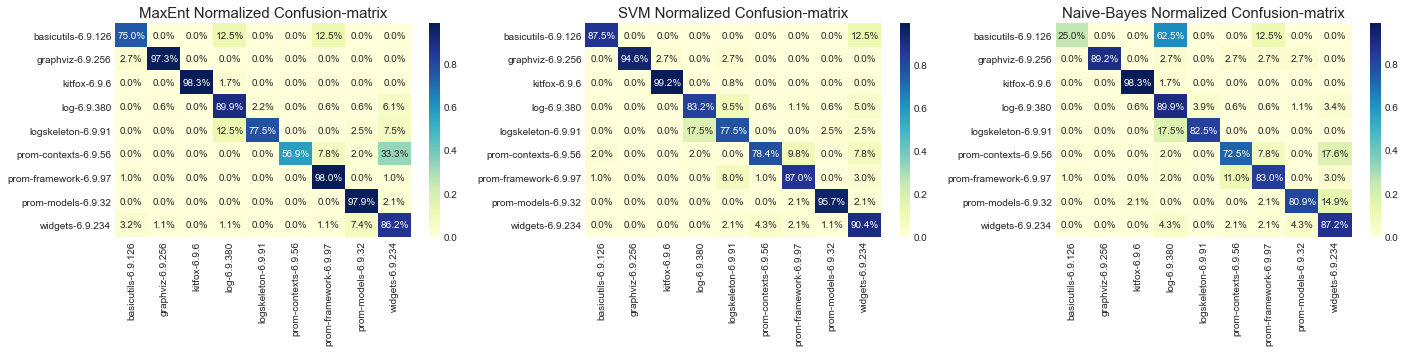

In [19]:
Graphs.plot_horizontal_graphs(metrics, 'norm')

## Classification report

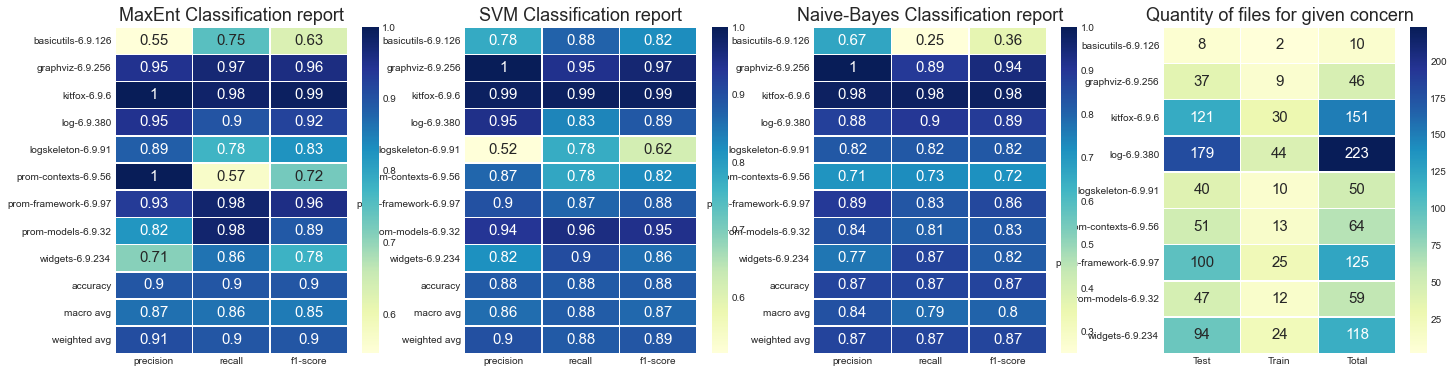

<Figure size 432x288 with 0 Axes>

In [20]:
Graphs.plot_horizontal_graphs(metrics, 'report')

## prediction average

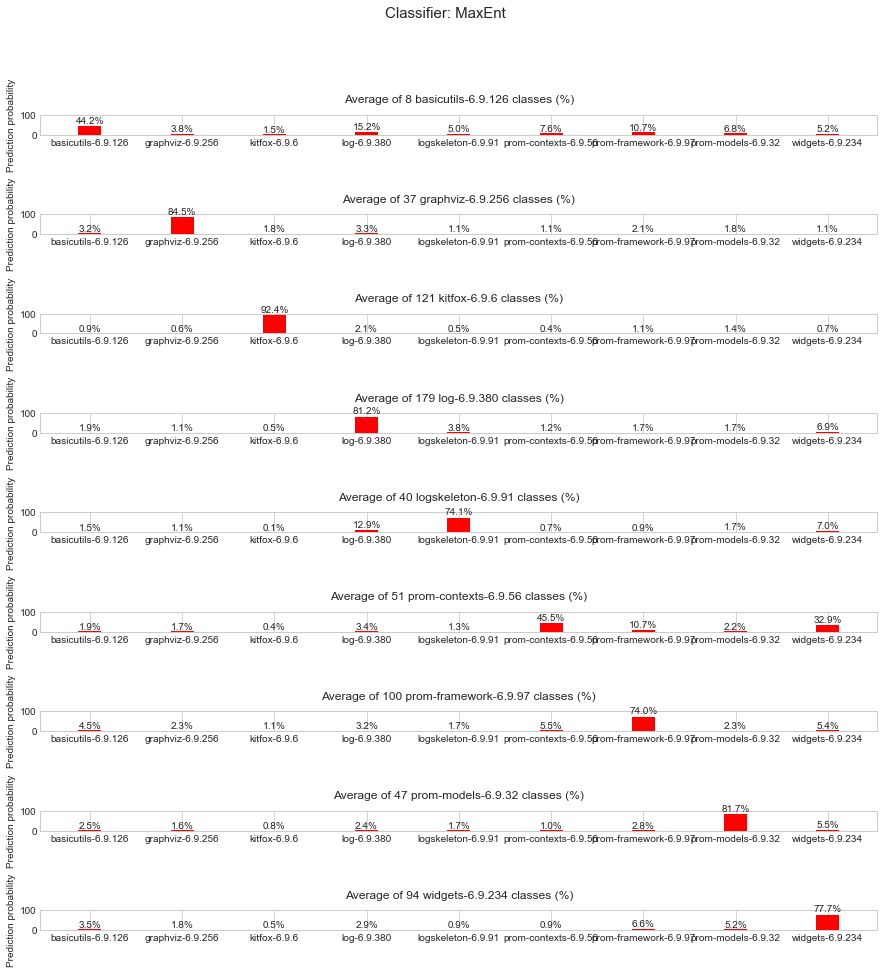

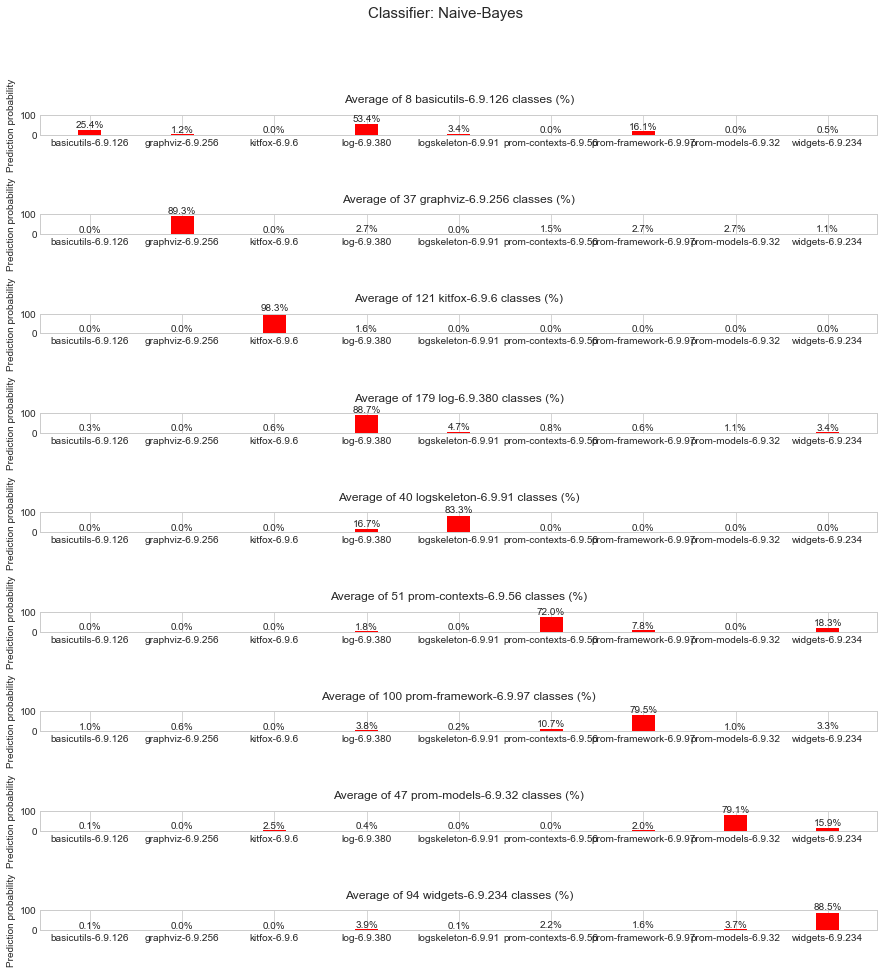

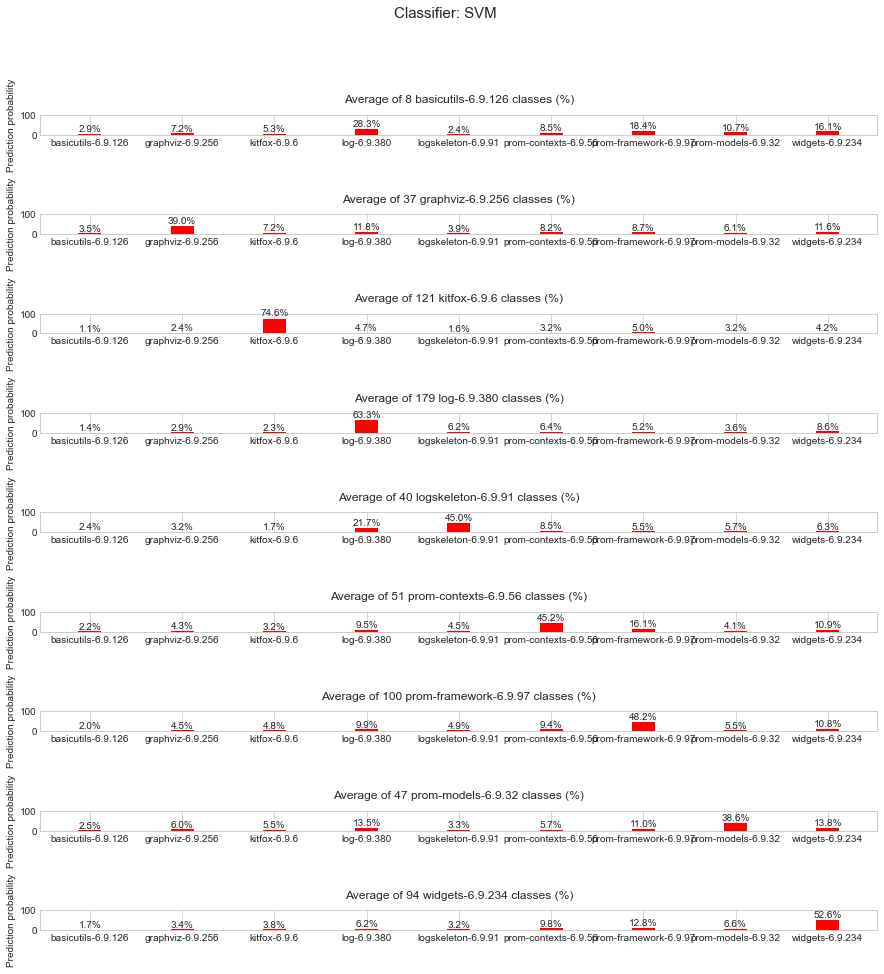

In [21]:
Graphs.plot_predictionScoreAverage(metrics_max_ent, classifier_max_ent)
Graphs.plot_predictionScoreAverage(metrics_naive, classifier_naive)
Graphs.plot_predictionScoreAverage(metrics_svm, classifier_svm)

In [22]:
maxEnt_accuracy_test1.append(metrics_max_ent.get_accuracy_score())
svm_accuracy_test1.append(metrics_svm.get_accuracy_score())
naive_accuracy_test1.append(metrics_naive.get_accuracy_score())

maxEnt_precision_test1.append(metrics_max_ent.get_precision_score())
svm_precision_test1.append(metrics_svm.get_precision_score())
naive_precision_test1.append(metrics_naive.get_precision_score())


maxEnt_recall_test1.append(metrics_max_ent.get_recall_score())
svm_recall_test1.append(metrics_svm.get_recall_score())
naive_recall_test1.append(metrics_naive.get_recall_score())

----

# Test 4: Test/Train 75/25 (%)


In [23]:
test_size=0.75
fold_quantity = 100
feature_representation = CountVectorizer()
# Train and gather evaluation metrics
confusion_list = []

evaluate = Eva.Evaluation(df_sliced, feature_representation, test_size, fold_quantity)
classifier_max_ent , metrics_max_ent = evaluate.evaluate_MaxEnt()
classifier_svm , metrics_svm = evaluate.evaluate_SVM()
classifier_naive, metrics_naive = evaluate.evaluate_Naive_Bayes()

metrics = {
    'maxEnt': metrics_max_ent,
    'SVM': metrics_svm,
    'Naive': metrics_naive
}

# Evaluation
## Confusion matrix

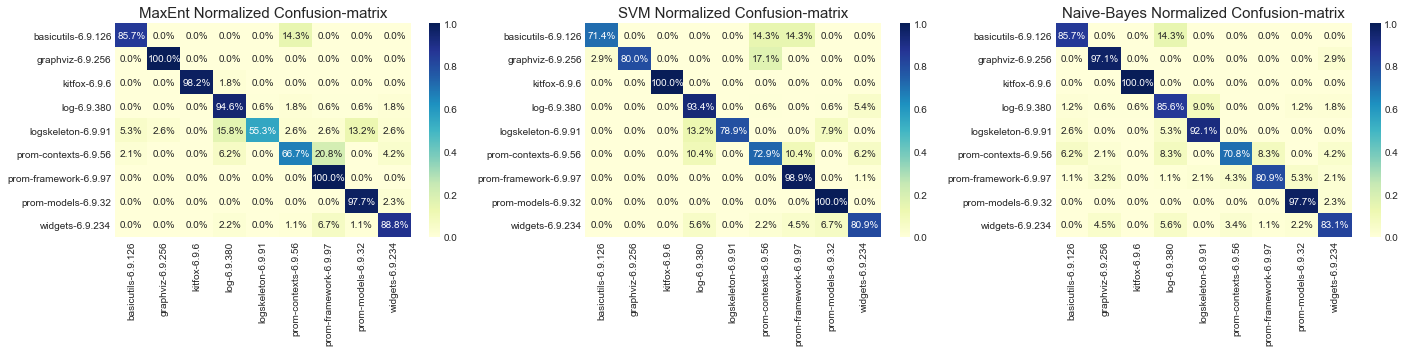

In [24]:
Graphs.plot_horizontal_graphs(metrics, 'norm')

## Classification report

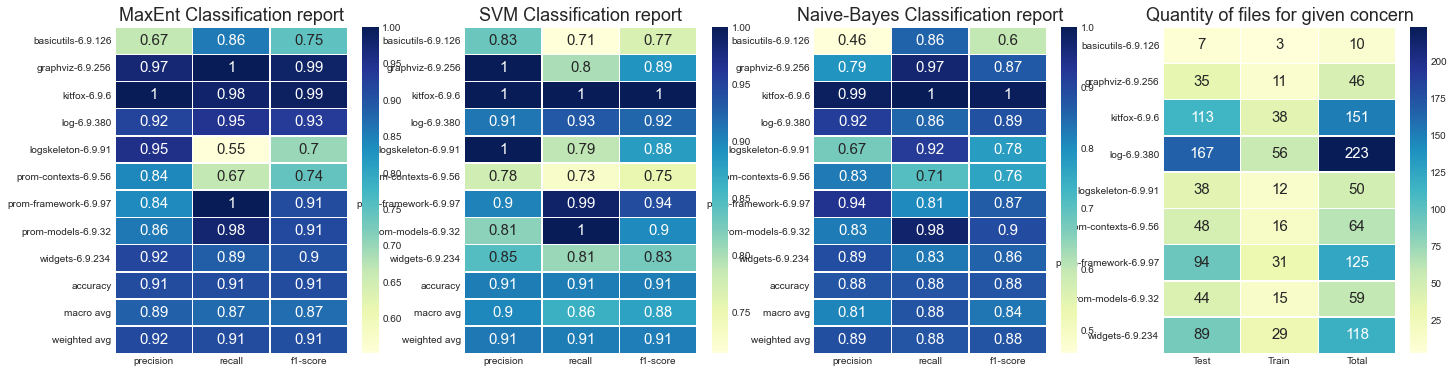

<Figure size 432x288 with 0 Axes>

In [25]:
Graphs.plot_horizontal_graphs(metrics, 'report')

## prediction average

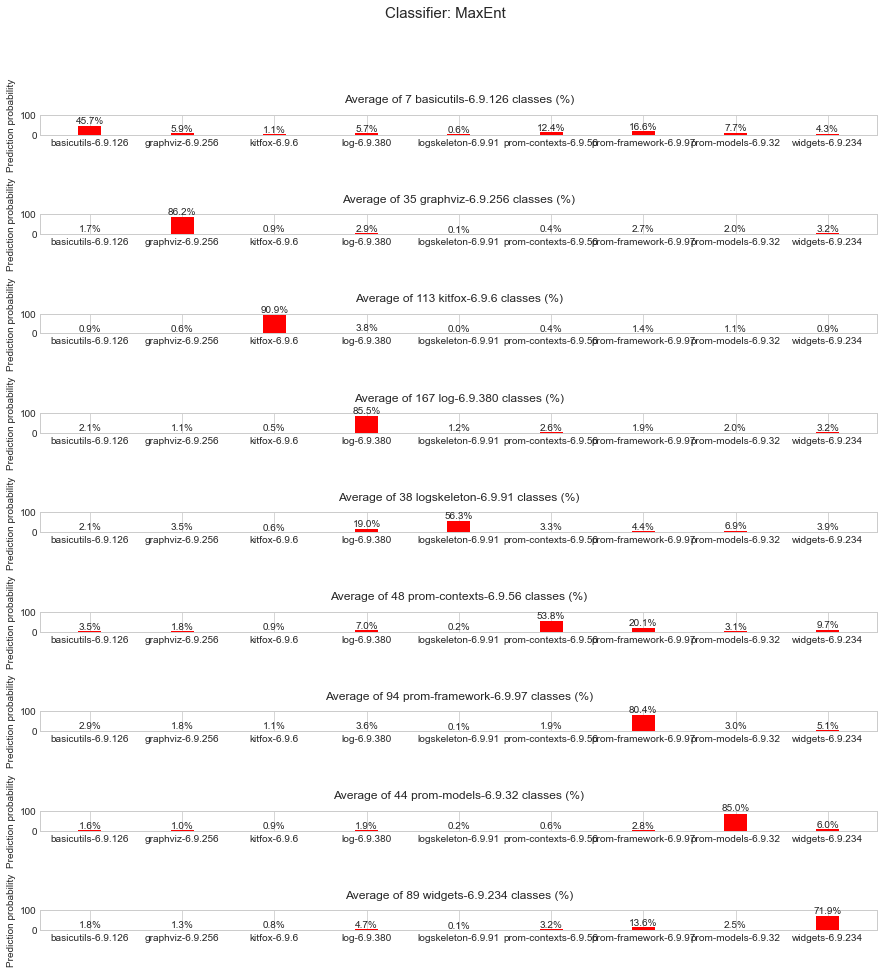

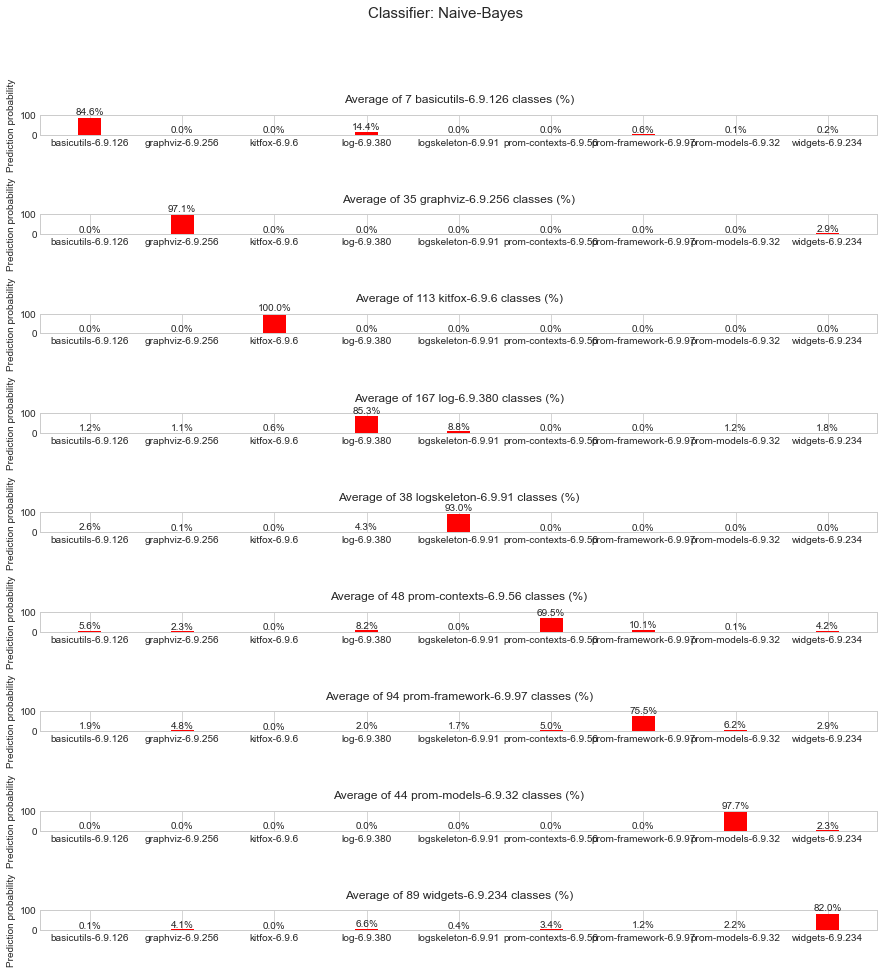

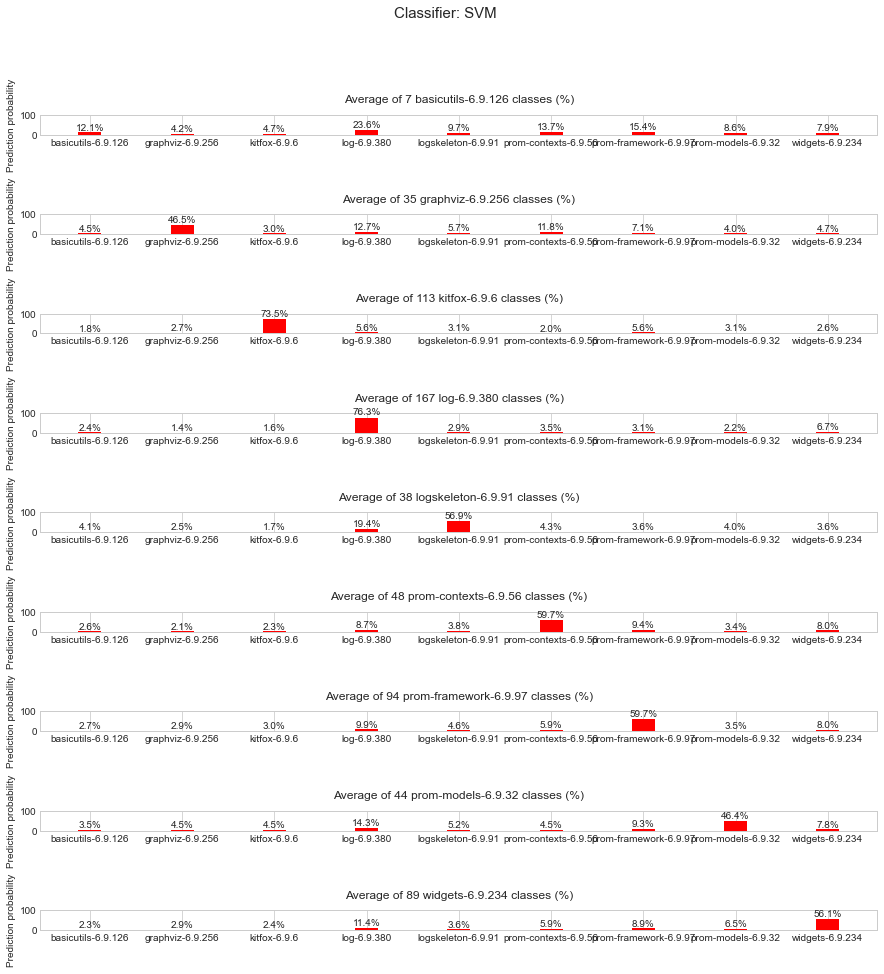

In [26]:
Graphs.plot_predictionScoreAverage(metrics_max_ent, classifier_max_ent)
Graphs.plot_predictionScoreAverage(metrics_naive, classifier_naive)
Graphs.plot_predictionScoreAverage(metrics_svm, classifier_svm)

In [27]:
maxEnt_accuracy_test1.append(metrics_max_ent.get_accuracy_score())
svm_accuracy_test1.append(metrics_svm.get_accuracy_score())
naive_accuracy_test1.append(metrics_naive.get_accuracy_score())

maxEnt_precision_test1.append(metrics_max_ent.get_precision_score())
svm_precision_test1.append(metrics_svm.get_precision_score())
naive_precision_test1.append(metrics_naive.get_precision_score())


maxEnt_recall_test1.append(metrics_max_ent.get_recall_score())
svm_recall_test1.append(metrics_svm.get_recall_score())
naive_recall_test1.append(metrics_naive.get_recall_score())

# Overall performance for test_size

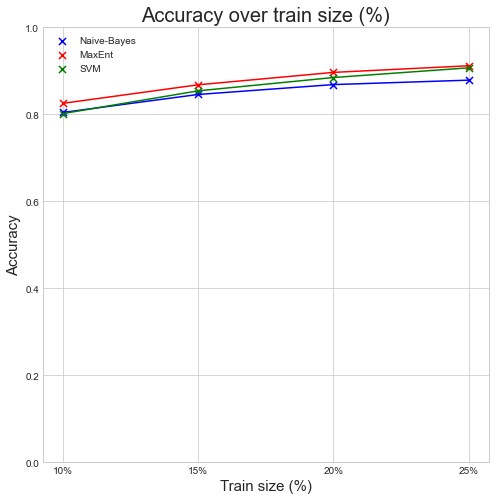

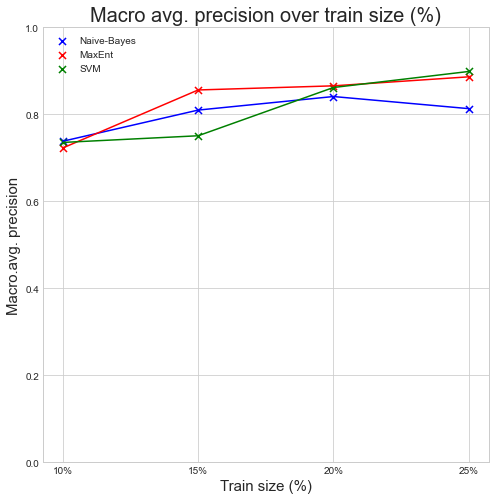

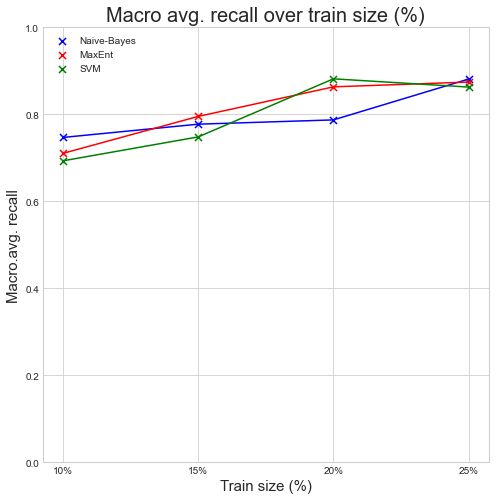

In [28]:
train_size = ['10%','15%','20%','25%']
number_of_files = ['5','10','15','20','25']
y_axis = {
    'naive': naive_accuracy_test1,
    'maxEnt': maxEnt_accuracy_test1,
    'svm': svm_accuracy_test1
}
#########ACCURACY#############################

Graphs.plot_line_graph("Accuracy over train size (%)", train_size, y_axis, "Train size (%)", "Accuracy")
##############################################

##############PRECISION#######################
Graphs.plot_line_graph("Macro avg. precision over train size (%)", train_size, {'naive': naive_precision_test1,
                                                             'maxEnt': maxEnt_precision_test1,
                                                             'svm': svm_precision_test1
                                                            }, "Train size (%)", "Macro.avg. precision",)
##############RECALL#######################
Graphs.plot_line_graph("Macro avg. recall over train size (%)", train_size, {'naive': naive_recall_test1,
                                                             'maxEnt': maxEnt_recall_test1,
                                                             'svm': svm_recall_test1
                                                            }, "Train size (%)", "Macro.avg. recall",)



